<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/Text-Based-AI/blob/master/trump_biden_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Exercise performs some basic Text Processing on the Last 2 Presidential debates between President Trump and Joe Biden.<br>It involves scraping the data and performing some text-preprocessing tasks to understand more about the words spoken by these two Aspirants, during the 2020 Presidential Debates.

[Debate_1](https://www.rev.com/blog/transcripts/donald-trump-joe-biden-1st-presidential-debate-transcript-2020)

[Debate_2](https://www.rev.com/blog/transcripts/donald-trump-joe-biden-final-presidential-debate-transcript-2020/amp)

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import word_tokenize
nltk.download('stopwords') # For stopwords removal
nltk.download('punkt')  # for tokenization
from nltk.corpus import stopwords
import spacy
from collections import defaultdict, Counter
from bs4 import BeautifulSoup
import requests
import string                                                                                                                                                       
print('All Imported!')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
All Imported!


In [39]:
debate_1 = "https://www.rev.com/blog/transcripts/donald-trump-joe-biden-1st-presidential-debate-transcript-2020"
debate_2 = 'https://www.rev.com/blog/transcripts/donald-trump-joe-biden-final-presidential-debate-transcript-2020/amp'

We need to scrape the data containing the texts from both debates.
Lets define a method that uses beautiful soup to parse the text data and returns two lists, of the interactions of both Trump and Biden.

In [73]:
def scrape_parse(link):
    """Scrape and preprocess text from rev.com,
        For Trump/Biden Presidential Debates
    
    @param,link: URL link to the website(rev.com)
    @return: Two lists (trump and biden)
    """
    source = requests.get(link).text
    soup = BeautifulSoup(source, 'lxml')
    texts = soup.findAll('p')
    corpus = [txt.text for txt in texts]

    if len(link) > 100:
        trump_corpus = [i for i in corpus if i.startswith('Donald')]
        biden_corpus = [i for i in corpus if i.startswith('Joe')]
        # Now we remove candidate names from start of each sentence
        trump_speech_list = [i[22:] for i in trump_corpus]
        biden_speech_list = [i[19:] for i in biden_corpus]
    else:
        trump_corpus = [i for i in corpus if i.startswith('President')]
        biden_corpus = [i for i in corpus if i.startswith('Vice')]
        # Now we remove candidate names from start of each sentence
        trump_speech_list = [i[35:] for i in trump_corpus]
        biden_speech_list = [i[34:] for i in biden_corpus]
        
    return trump_speech_list, biden_speech_list

In [74]:
# getting the list of speeches from the first debate
trump_debate_1, biden_debate_1 = scrape_parse(debate_1)

In [75]:
# getting the list of speeches for the second debate
trump_debate_2, biden_debate_2 = scrape_parse(debate_2)

Let's make these nltk text objects

In [79]:
trump_1 = nltk.Text(trump_debate_1)
trump_2 =  nltk.Text(trump_debate_2)
print(type(trump_1))

<class 'nltk.text.Text'>


In [80]:
biden_1 = nltk.Text(biden_debate_1)
biden_2 = nltk.Text(biden_debate_2)
print(type(biden_1))

<class 'nltk.text.Text'>


<h3>1. Let's see the percentage of times each person took the stage</h3>

In [81]:
first = {'Trump':[len(trump_debate_1)], 'Biden':[len(biden_debate_1)]}
second = {'Trump':[len(trump_debate_2)], 'Biden':[len(biden_debate_2)]}
first_df = pd.DataFrame(first)
second_df = pd.DataFrame(second)

In [82]:
# Let's make each a percent
total_stage1 = len(trump_debate_1 + biden_debate_1)
total_stage2 = len(trump_debate_2 + biden_debate_2)

# Let's use apply and lambda
first_df = first_df.apply(lambda x: round(x / total_stage1, 2))
second_df = second_df.apply(lambda x: round(x / total_stage2, 2))

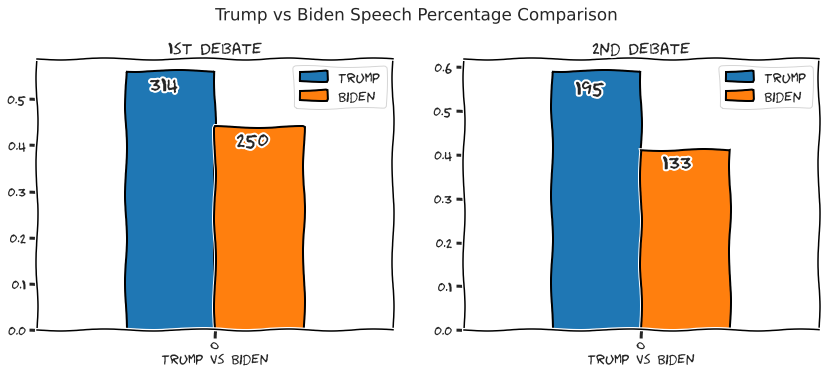

In [197]:
sns.set_style('ticks')
fig = plt.figure(figsize=(14,5)) # create figure
plt.suptitle('Trump vs Biden Speech Percentage Comparison', y=1.025)

plt.xkcd()

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

first_df.plot(kind='bar', edgecolor='black', linewidth=2, ax=ax0)
ax0.set_title('1st Debate')
ax0.set_xlabel('Trump vs Biden')
ax0.annotate('314', (-0.185, 0.52), fontsize=20, fontweight='bold')
ax0.annotate('250', (0.06, 0.4), fontsize=20, fontweight='bold')

second_df.plot(kind='bar', edgecolor='black', linewidth=2, ax=ax1)
plt.title('2nd Debate')
plt.xlabel('Trump vs Biden')
ax1.annotate('195', (-0.185, 0.54), fontsize=20, fontweight='bold')
ax1.annotate('133', (0.06, 0.37), fontsize=20, fontweight='bold')


plt.show()

#plt.rcdefaults()  # to stop xkcd plots

In [77]:
print(f'Trump spoke {len(trump_debate_1)} times in debate one and {len(trump_debate_2)} times in two.')
print(f'Biden spoke {len(biden_debate_1)} times in debate one and {len(biden_debate_2)} times in two.')

Trump spoke 314 times in debate one and 195 times in two.
Biden spoke 250 times in debate one and 133 times in two.


Let's clean the texts and remove punctuations and stopwords

In [198]:
def tokenize_words(corpus):
    word_list = []
    for sentence in corpus:
        word_list += word_tokenize(sentence)
    return word_list

In [199]:
def remove_punctuations(corpus):
    word_list = tokenize_words(corpus)
    words_noPunct = [i for i in word_list if i not in string.punctuation]
    return words_noPunct

In [200]:
def remove_stopwords(corpus):
    word_list = remove_punctuations(corpus)
    words_cleaned = [i for i in word_list if i not in stopwords.words('english')]
    return words_cleaned

For Trump...

In [201]:
trump_1 = remove_stopwords(trump_1)
trump_2 = remove_stopwords(trump_2)
trump_total_words = trump_1 + trump_2

# Now make these nltk text objects
trump_1 = nltk.text.Text(trump_1)
trump_2 = nltk.text.Text(trump_2)
trump_total_words = nltk.text.Text(trump_total_words)

For Biden...

In [202]:
biden_1 = remove_stopwords(biden_1)
biden_2 = remove_stopwords(biden_2)
biden_total_words = biden_1 + biden_2

# Now make these nltk text objects
biden_1 = nltk.text.Text(biden_1)
biden_2 = nltk.text.Text(biden_2)
biden_total_words = nltk.text.Text(biden_total_words)

<h3>2. Let's check the Lexical-richness or Diversity of the words spoken by Trump and Biden</h3>

In [208]:
def vocab(text):
    """find the unique tokens or vocab,
    In a given text object
    """
    vocabulary = list(set(text))
    return vocabulary

In [265]:
len(vocab(biden_total_words))

2009

In [211]:
def lexical_diversity(text):
    """find the ratio of the vocabulary to,
        total tokens in the text.
    """
    vocabulary = vocab(text)
    return round(len(vocabulary)/len(text), 2)

In [247]:
# For the word-count comparison
word_count_df = pd.DataFrame(columns=['Word_Count'], index=['Trump', 'Biden'])

for index, row in word_count_df.iterrows():
    if index is 'Trump':
        row['Word_Count'] = len(trump_total_words)
    else:
        row['Word_Count'] = len(biden_total_words)

# For the lexical diversity comparison
lex_var_df = pd.DataFrame(columns=['Lexical-Diversity'], index=['Trump', 'Biden'])

for index, row in lex_var_df.iterrows():
    if index is 'Trump':
        row['Lexical-Diversity'] = lexical_diversity(trump_total_words)
    else:
        row['Lexical-Diversity'] = lexical_diversity(biden_total_words)
word_count_df

,Word_Count
Trump,9214
Biden,7945


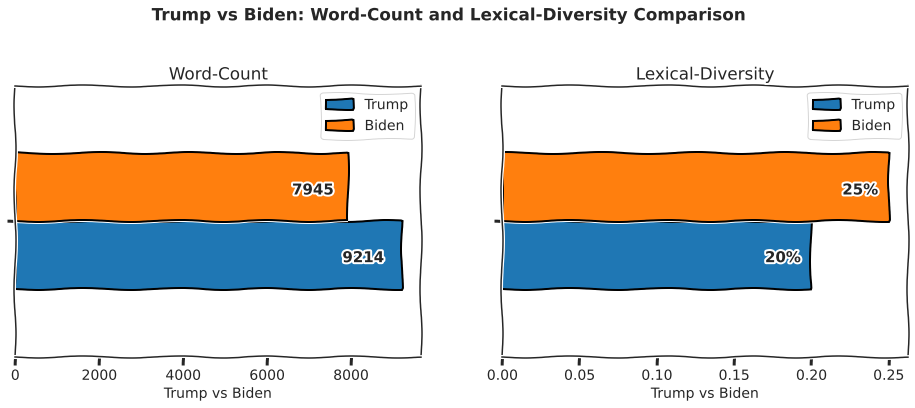

In [270]:
sns.set_style('ticks')
fig = plt.figure(figsize=(16,5)) # create figure
plt.suptitle('Trump vs Biden: Word-Count and Lexical-Diversity Comparison', y=1.1, fontweight='bold')

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

word_count_df.T.plot(kind='barh', edgecolor='black', linewidth=2, ax=ax0)
ax0.set_title('Word-Count')
ax0.set_xlabel('Trump vs Biden')
ax0.set_yticklabels('')
ax0.annotate('7945', (6600, 0.099), fontsize=15, fontweight='bold')
ax0.annotate('9214', (7800, -0.15), fontsize=15, fontweight='bold')

lex_var_df.T.plot(kind='barh', edgecolor='black', linewidth=2, ax=ax1)
plt.title('Lexical-Diversity')
plt.xlabel('Trump vs Biden')
ax1.set_yticklabels('')
ax1.annotate('25%', (0.22, 0.099), fontsize=15, fontweight='bold')
ax1.annotate('20%', (0.17, -0.15), fontsize=15, fontweight='bold')

plt.show()

1. Trump utters a total 9214 words(rid of stopwords and punctuations) comprising of 1867 unique words, giving a Lexical-Richness score of 20%.

2. Biden utters a total 7945 words(rid of stopwords and punctuations) comprising of 2009 unique words, giving a Lexical-Richness score of 25%.

3. Know that in both debates Trump utters more words than Biden in a ratio of roughly (55:45) in first debate and (60:40) in second debate.


3. <h3>TFIDF for both Presidential Candidates</h3>

So what are the candidates even talking about, Let's see the most words used by trump that seem to be important to only him.
We  shall use a process called tfidf to figure this out.